### **Question 1** ###

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming your data is in a CSV file, you would read it into a pandas DataFrame.
# If you have the data in another format, you can adjust the read function accordingly.
df = pd.read_csv('CHRF_typhoid_02.csv')

# Convert 'AdmDate' to datetime
df['AdmDate'] = pd.to_datetime(df['AdmDate'])

In [41]:
df.head(5)

,ID,PatientType,AdmDate,Age,Sex,Pathogen,Ampicillin,Chloramphenicol,Cotrimoxazole,Ciprofloxacin,Azithromycin,MDR
0,103108,OPD,2009-02-07,6,Male,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR
1,103109,OPD,2009-05-22,9,Male,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR
2,103110,OPD,2009-04-10,8,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR
3,103111,OPD,2009-11-24,2,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR
4,103112,IPD,2009-07-09,9,Male,Salmonella typhi,Sensitive,Sensitive,Sensitive,Intermediate,Sensitive,Not-MDR


In [42]:
# Extract year from 'AdmDate' and create a new column for it
df['Year'] = df['AdmDate'].dt.year
df['Year'].head()

0    2009
1    2009
2    2009
3    2009
4    2009
Name: Year, dtype: int32

In [43]:
# Aggregate the data to get the count of typhoid cases per year
yearly_cases = df.groupby('Year').size()
yearly_cases

Year
2009    174
2010    309
2011    256
2012    237
2013    210
2014    213
2015    216
2016    567
2017    925
dtype: int64

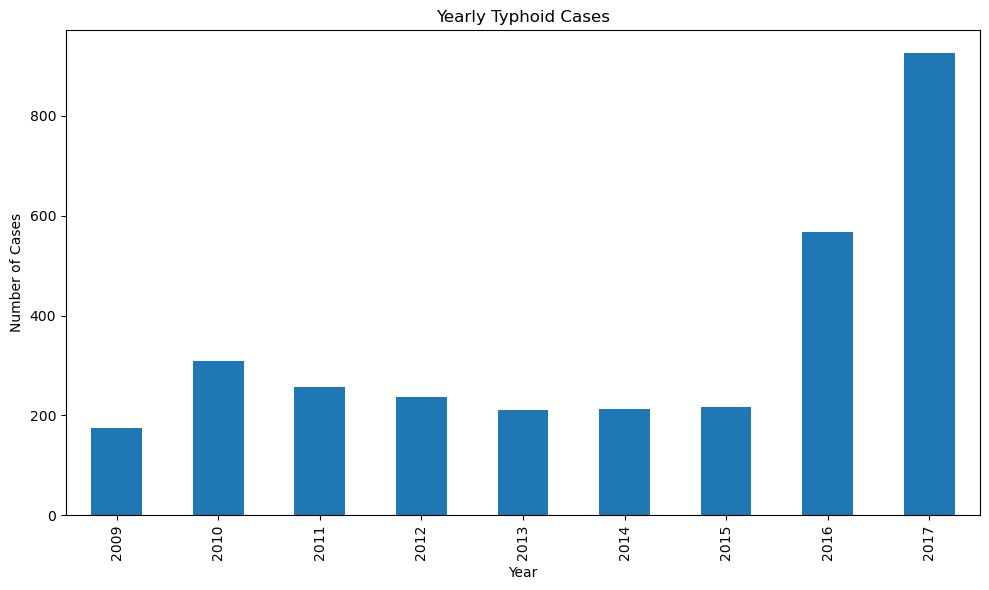

In [44]:
# Plot the total number of typhoid cases per year as a bar chart
plt.figure(figsize=(10, 6))
yearly_cases.plot(kind='bar')
plt.title('Yearly Typhoid Cases')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.savefig('yearly_typhoid_cases.png')
plt.show()


In [51]:
# Aggregate the data to get the count of typhoid cases per year, based on PatientType
yearly_patient_type_cases = df.groupby(['Year', 'PatientType'])
yearly_patient_type_cases.head(5)

,ID,PatientType,AdmDate,Age,Sex,Pathogen,Ampicillin,Chloramphenicol,Cotrimoxazole,Ciprofloxacin,Azithromycin,MDR,Year
0,103108,OPD,2009-02-07,6,Male,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2009
1,103109,OPD,2009-05-22,9,Male,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2009
2,103110,OPD,2009-04-10,8,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2009
3,103111,OPD,2009-11-24,2,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2009
4,103112,IPD,2009-07-09,9,Male,Salmonella typhi,Sensitive,Sensitive,Sensitive,Intermediate,Sensitive,Not-MDR,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,105297,OPD,2017-09-28,4,Male,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2017
2190,105298,OPD,2017-06-12,5,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2017
2191,105299,OPD,2017-04-15,6,Male,Salmonella typhi,Sensitive,Sensitive,Sensitive,Intermediate,Sensitive,Not-MDR,2017
2434,105542,ipd,2017-11-25,6,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2017


In [15]:
# Aggregate the data to get the count of typhoid cases per year, based on PatientType
yearly_patient_type_cases = df.groupby(['Year', 'PatientType']).size().unstack(fill_value=0)

In [52]:
yearly_patient_type_cases.head()

,ID,PatientType,AdmDate,Age,Sex,Pathogen,Ampicillin,Chloramphenicol,Cotrimoxazole,Ciprofloxacin,Azithromycin,MDR,Year
0,103108,OPD,2009-02-07,6,Male,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2009
1,103109,OPD,2009-05-22,9,Male,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2009
2,103110,OPD,2009-04-10,8,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2009
3,103111,OPD,2009-11-24,2,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2009
4,103112,IPD,2009-07-09,9,Male,Salmonella typhi,Sensitive,Sensitive,Sensitive,Intermediate,Sensitive,Not-MDR,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,105297,OPD,2017-09-28,4,Male,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2017
2190,105298,OPD,2017-06-12,5,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2017
2191,105299,OPD,2017-04-15,6,Male,Salmonella typhi,Sensitive,Sensitive,Sensitive,Intermediate,Sensitive,Not-MDR,2017
2434,105542,ipd,2017-11-25,6,Female,Salmonella typhi,Resistant,Resistant,Resistant,Intermediate,Sensitive,MDR,2017


<Figure size 1000x600 with 0 Axes>

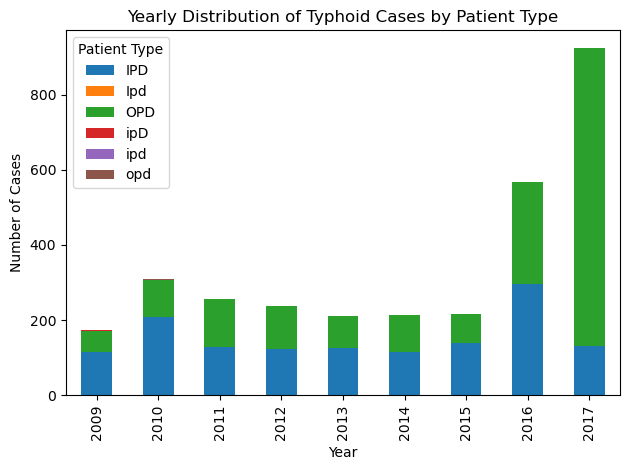

In [16]:
# Plot the distribution of cases based on patient type throughout the years as a stacked bar chart
plt.figure(figsize=(10, 6))
yearly_patient_type_cases.plot(kind='bar', stacked=True)
plt.title('Yearly Distribution of Typhoid Cases by Patient Type')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Patient Type')
plt.tight_layout()
plt.savefig('yearly_patient_type_cases.png')
plt.show()

### **Question 2** ###

In [17]:
children_df = df[df['Age'] < 18]

In [18]:
# Calculate the percentage of children with typhoid categorized by sex
sex_distribution = children_df['Sex'].value_counts(normalize=True)

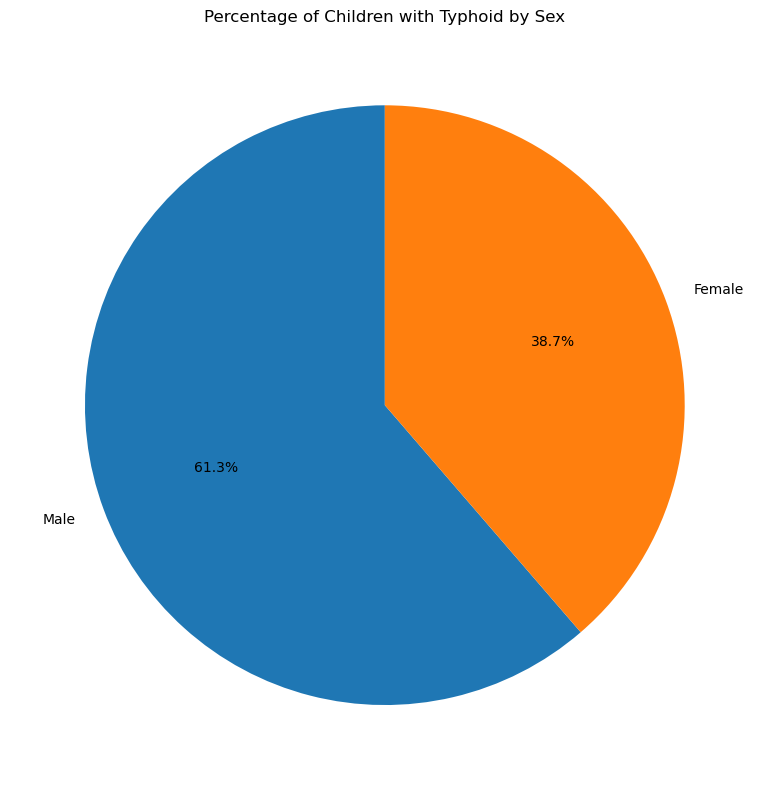

In [19]:
# Plot the distribution by sex as a pie chart
plt.figure(figsize=(8, 8))
sex_distribution.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Children with Typhoid by Sex')
plt.ylabel('')  # Hide the y-label
plt.tight_layout()
plt.savefig('sex_distribution_pie_chart.png')
plt.show()

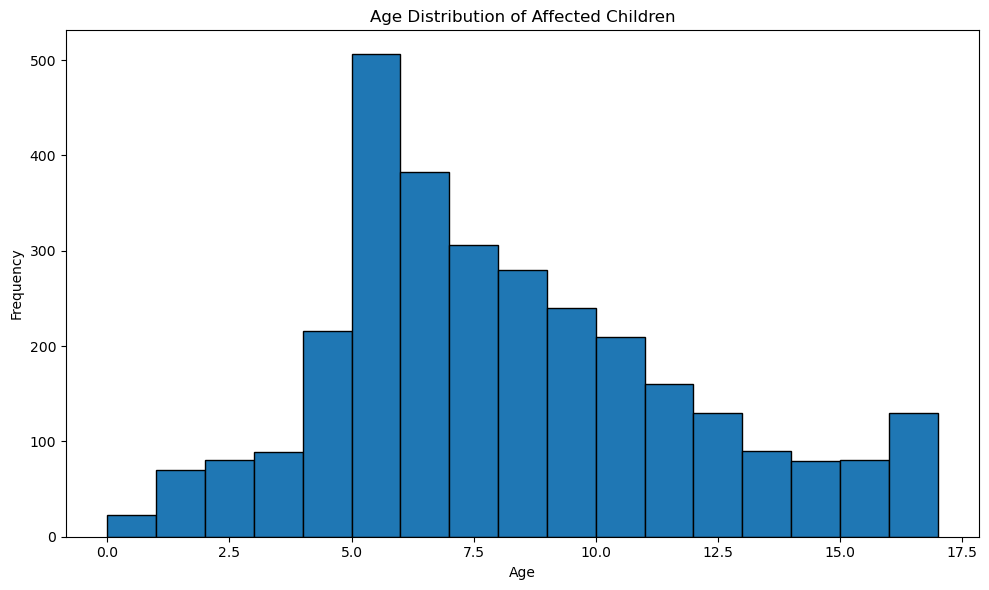

In [20]:
# Plot the age distribution of the affected children as a histogram
plt.figure(figsize=(10, 6))
children_df['Age'].plot.hist(bins=range(0, 18), edgecolor='black')
plt.title('Age Distribution of Affected Children')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('age_distribution_histogram.png')
plt.show()

In [21]:
# Determine the average (mean and median) age of children based on gender
average_ages = children_df.groupby('Sex')['Age'].agg(['mean', 'median', 'std'])

# Print the calculated mean, median, and standard deviation
print(average_ages)

            mean  median       std
Sex                               
Female  7.776936     7.0  3.736688
Male    7.711253     7.0  3.717230


### **Question 3** ###

In [22]:
df['AdmDate'] = pd.to_datetime(df['AdmDate'])
df['Year'] = df['AdmDate'].dt.year

In [24]:
# Define a function to calculate the resistance percentage
def calculate_resistance_percentage(df, drug_name):
    resistance_count = df[df[drug_name] == 'Resistant'].groupby('Year').size()
    total_count = df.groupby('Year').size()
    resistance_percentage = (resistance_count / total_count) * 100
    return resistance_percentage.fillna(0)  # Fill NaN with 0 which indicates no resistance data

# Calculate the year-wise resistance percentage for Ciprofloxacin
cipro_resistance_percentage = calculate_resistance_percentage(df, 'Ciprofloxacin')

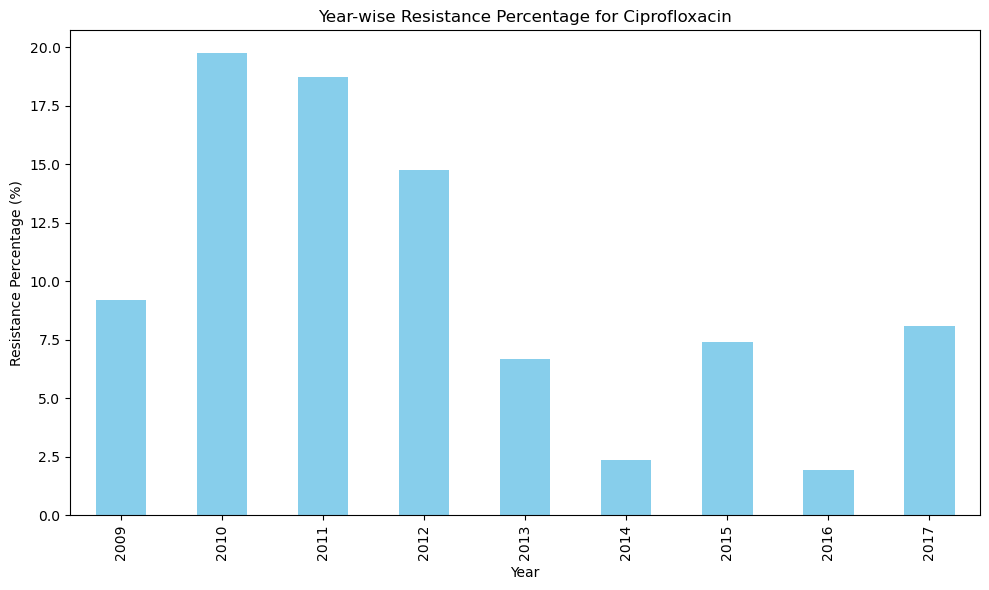

In [25]:
# Plot the resistance percentage for Ciprofloxacin
plt.figure(figsize=(10, 6))
cipro_resistance_percentage.plot(kind='bar', color='skyblue')
plt.title('Year-wise Resistance Percentage for Ciprofloxacin')
plt.xlabel('Year')
plt.ylabel('Resistance Percentage (%)')
plt.tight_layout()
plt.savefig('ciprofloxacin_resistance_percentage.png')
plt.show()

In [26]:
# Calculate the year-wise resistance percentage for Azithromycin
azithro_resistance_percentage = calculate_resistance_percentage(df, 'Azithromycin')

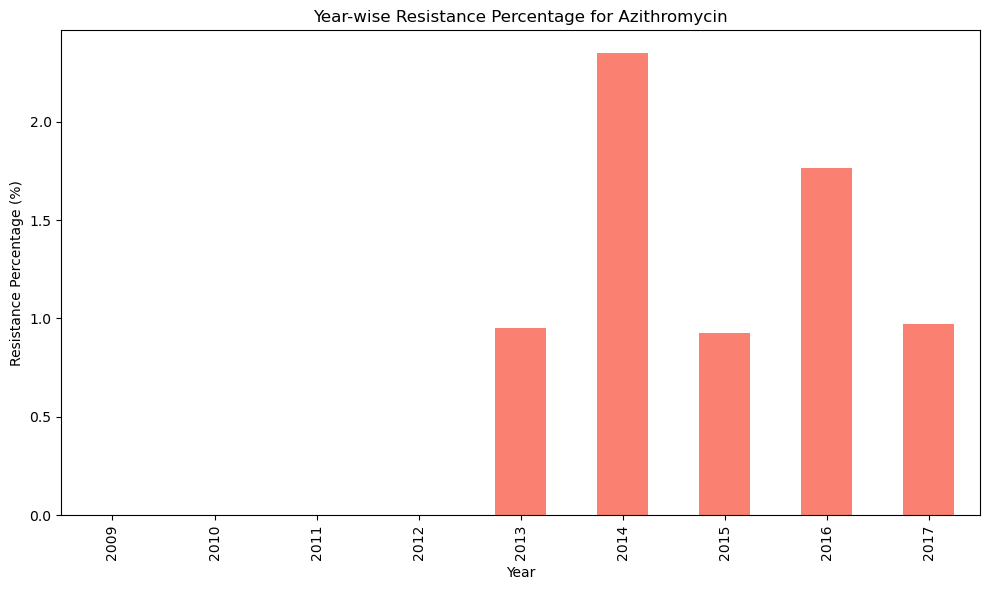

In [27]:
# Plot the resistance percentage for Azithromycin
plt.figure(figsize=(10, 6))
azithro_resistance_percentage.plot(kind='bar', color='salmon')
plt.title('Year-wise Resistance Percentage for Azithromycin')
plt.xlabel('Year')
plt.ylabel('Resistance Percentage (%)')
plt.tight_layout()
plt.savefig('azithromycin_resistance_percentage.png')
plt.show()

### **Question 4** ###

In [29]:
df['AdmDate'] = pd.to_datetime(df['AdmDate'])
df['Year'] = df['AdmDate'].dt.year

In [30]:
# Determine the count of MDR cases per year
mdr_cases = df[df['MDR'] == 'MDR'].groupby('Year').size()

In [31]:
total_cases = df.groupby('Year').size()

In [32]:
mdr_prevalence = (mdr_cases / total_cases) * 100

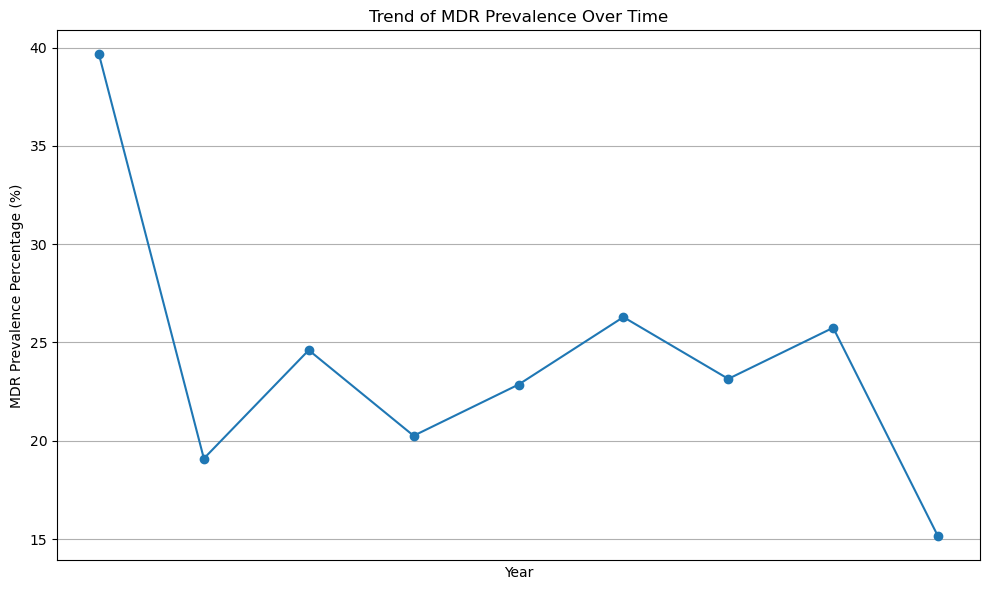

In [33]:
# Plot the trend of MDR prevalence over time
plt.figure(figsize=(10, 6))
mdr_prevalence.plot(kind='line', marker='o')
plt.title('Trend of MDR Prevalence Over Time')
plt.xlabel('Year')
plt.ylabel('MDR Prevalence Percentage (%)')
plt.grid(True)
plt.xticks(df['Year'].unique())  # Set x-ticks to be each unique year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format x-axis labels as years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks locator to year intervals
plt.tight_layout()
plt.savefig('mdr_prevalence_trend.png')
plt.show()